# Battle of Neighborhoods

### Peer -Graded Assignment (part-2)-Capstone Project

In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

### Using data available on Wikipedia

We will import this data into the jupyter Notebook.

In [54]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!pip install geopy
!pip install folium
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import xml
import folium



In [55]:
url = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=995657573').text
soup = BeautifulSoup(url,'lxml')

#### We will import the Table from Wiki page using Beautiful Soup

## Converting into dataframe:

In [67]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
#all_tables=soup.find_all("table")

table_post = soup.find('table')
fields = table_post.find_all('td')

postcode = []
borough = []
neighbourhood = []

for i in range(0, len(fields), 3):
    postcode.append(fields[i].text.strip())
    borough.append(fields[i+1].text.strip())
    neighbourhood.append(fields[i+2].text.strip())
        
df = pd.DataFrame(data=[postcode, borough, neighbourhood]).transpose()
df.columns = ['Postcode', 'Borough', 'Neighbourhood']
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


We know by inspecting the Wikipedia page that our desired table has class = "wikitable sortable"

In [78]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df.columns = ['Postcode', 'Borough', 'Neighbourhood']
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [68]:
#right_table=soup.find('table', class_='wikitable sortable')
df['Borough'].replace('Not assigned', np.nan, inplace=True)
df.dropna(subset=['Borough'], inplace=True)

df.head(20)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


Once we have our table stored in right_table, we can extract the columns and cell values from this table
We know that each row begins with a tr tab and each cell value will begin with a td tab.

More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.

## Cleaning the Data

In [72]:
#df=pd.DataFrame(A,columns=['Postal Code'])
#df['Borough']=B
#df['Neighborhood']=C
#df.head(10)
df.shape

(103, 3)

We only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [79]:
df = df[df["Borough"]!='Not assigned\n']
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [82]:
df.sort_values(by = ["Postcode"],inplace = True)

In [83]:
#B = pd.DataFrame(df_combined.Borough.str.split('\n').str[0])
#N = pd.DataFrame(df_combined.Neighborhood.str.split('\n').str[0])

df.reset_index(inplace=True)
df.head(5)

,index,Postcode,Borough,Neighbourhood
0,0,M1B,Scarborough,"Malvern, Rouge"
1,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,3,M1G,Scarborough,Woburn
4,4,M1H,Scarborough,Cedarbrae


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [12]:
df[df["Neighborhood"]=='Not assigned']

,Postal Code,Borough,Neighborhood


In [84]:
## Define Foursquare Credentials and Version

CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [97]:
df.reset_index(inplace=True)

In [98]:
df.head()

,level_0,index,Postcode,Borough,Neighbourhood
0,0,0,M1B,Scarborough,"Malvern, Rouge"
1,1,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,3,3,M1G,Scarborough,Woburn
4,4,4,M1H,Scarborough,Cedarbrae


In [103]:
data = df[["Postcode","Borough","Neighbourhood"]]
data.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [104]:
set(data["Borough"])

{'Central Toronto',
 'Downtown Toronto',
 'East Toronto',
 'East York',
 'Etobicoke',
 'Mississauga',
 'North York',
 'Scarborough',
 'West Toronto',
 'York'}

In [108]:
df_tor = data[data["Borough"].isin(["Central Toronto","Downtown Toronto","East Toronto","West Toronto"])]
df_tor.head()

,Postcode,Borough,Neighbourhood
37,M4E,East Toronto,The Beaches
41,M4K,East Toronto,"The Danforth West, Riverdale"
42,M4L,East Toronto,"India Bazaar, The Beaches West"
43,M4M,East Toronto,Studio District
44,M4N,Central Toronto,Lawrence Park


In [24]:
!pip -q install folium
import folium

In [25]:
latitude = 43.6532
longitude = -79.3832
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6532, -79.3832.


In [ ]:
ap_tor = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Borough'], df_tor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

In [ ]:
map_tor = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Borough'], df_tor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

## Defining Foursquare Credentials

Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.

In [ ]:
neighborhood_latitude = df_tor.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_tor.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_tor.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Now, let's get the top 100 venues that are in The Beaches within a radius of 700 metres.
First, let's create the GET request URL.

In [ ]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 700 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

In [ ]:
results = requests.get(url).json()

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

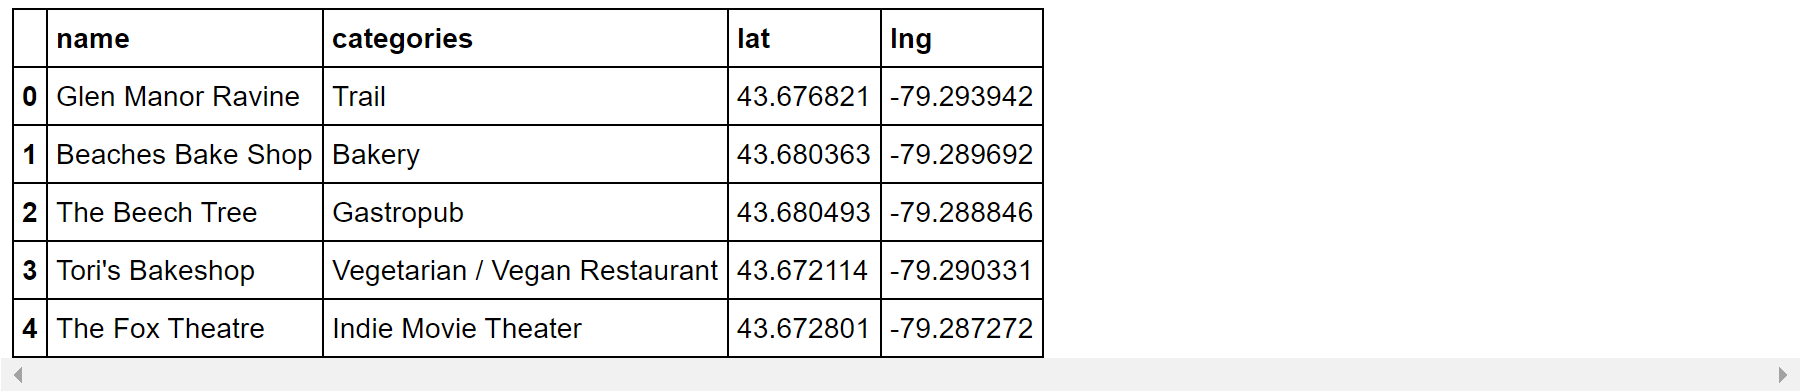

In [121]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0])


44 venues were returned by Foursquare.


## Explore Neighborhoods in Toronto

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=df_tor['Neighborhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']

In [118]:
print("toronto_venues")
print(toronto_venues.shape)
toronto_venues.head()

toronto_venues


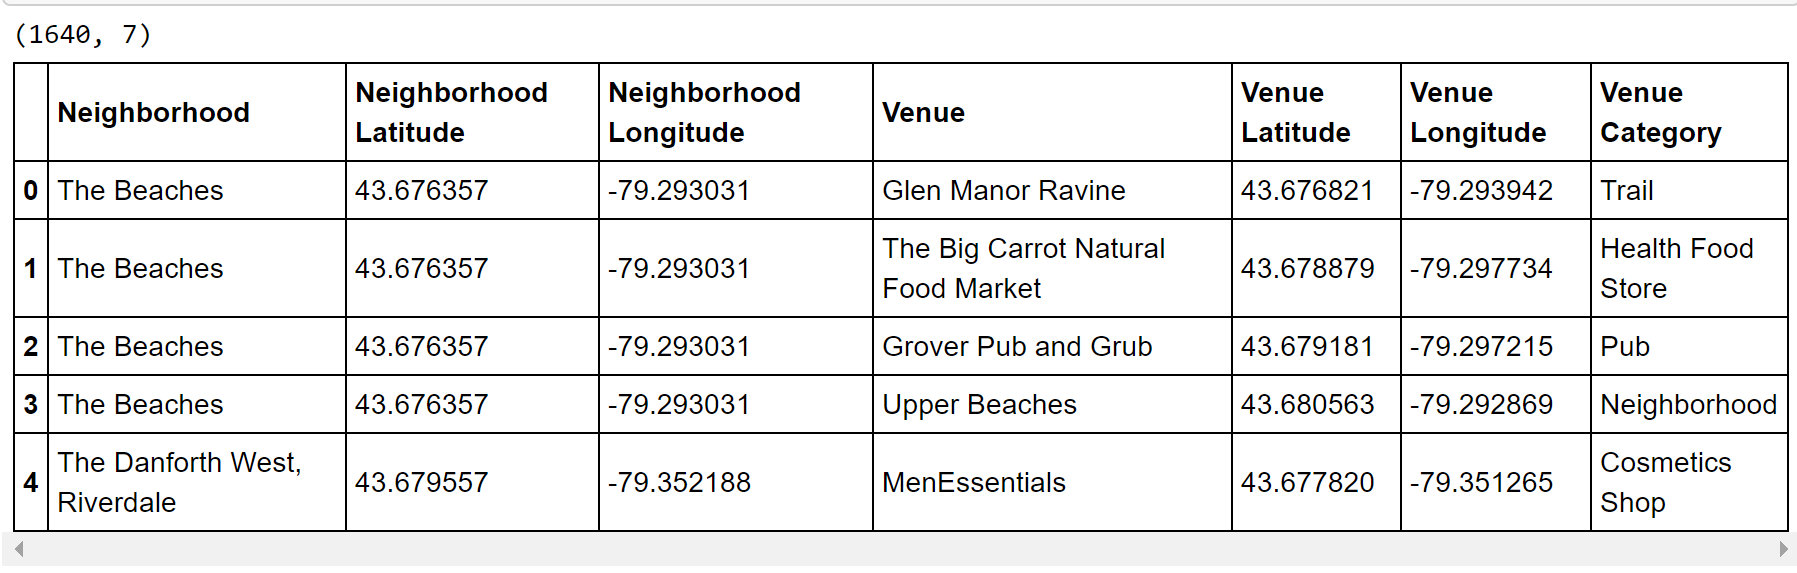

In [120]:
#toronto_venues.groupby('Neighborhood').count()

In [122]:
print('There are 238 uniques categories.'.format(len(toronto_venues['Venue Category'].unique()))


There are 238 uniques categories.


## Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
#move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped.shape

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

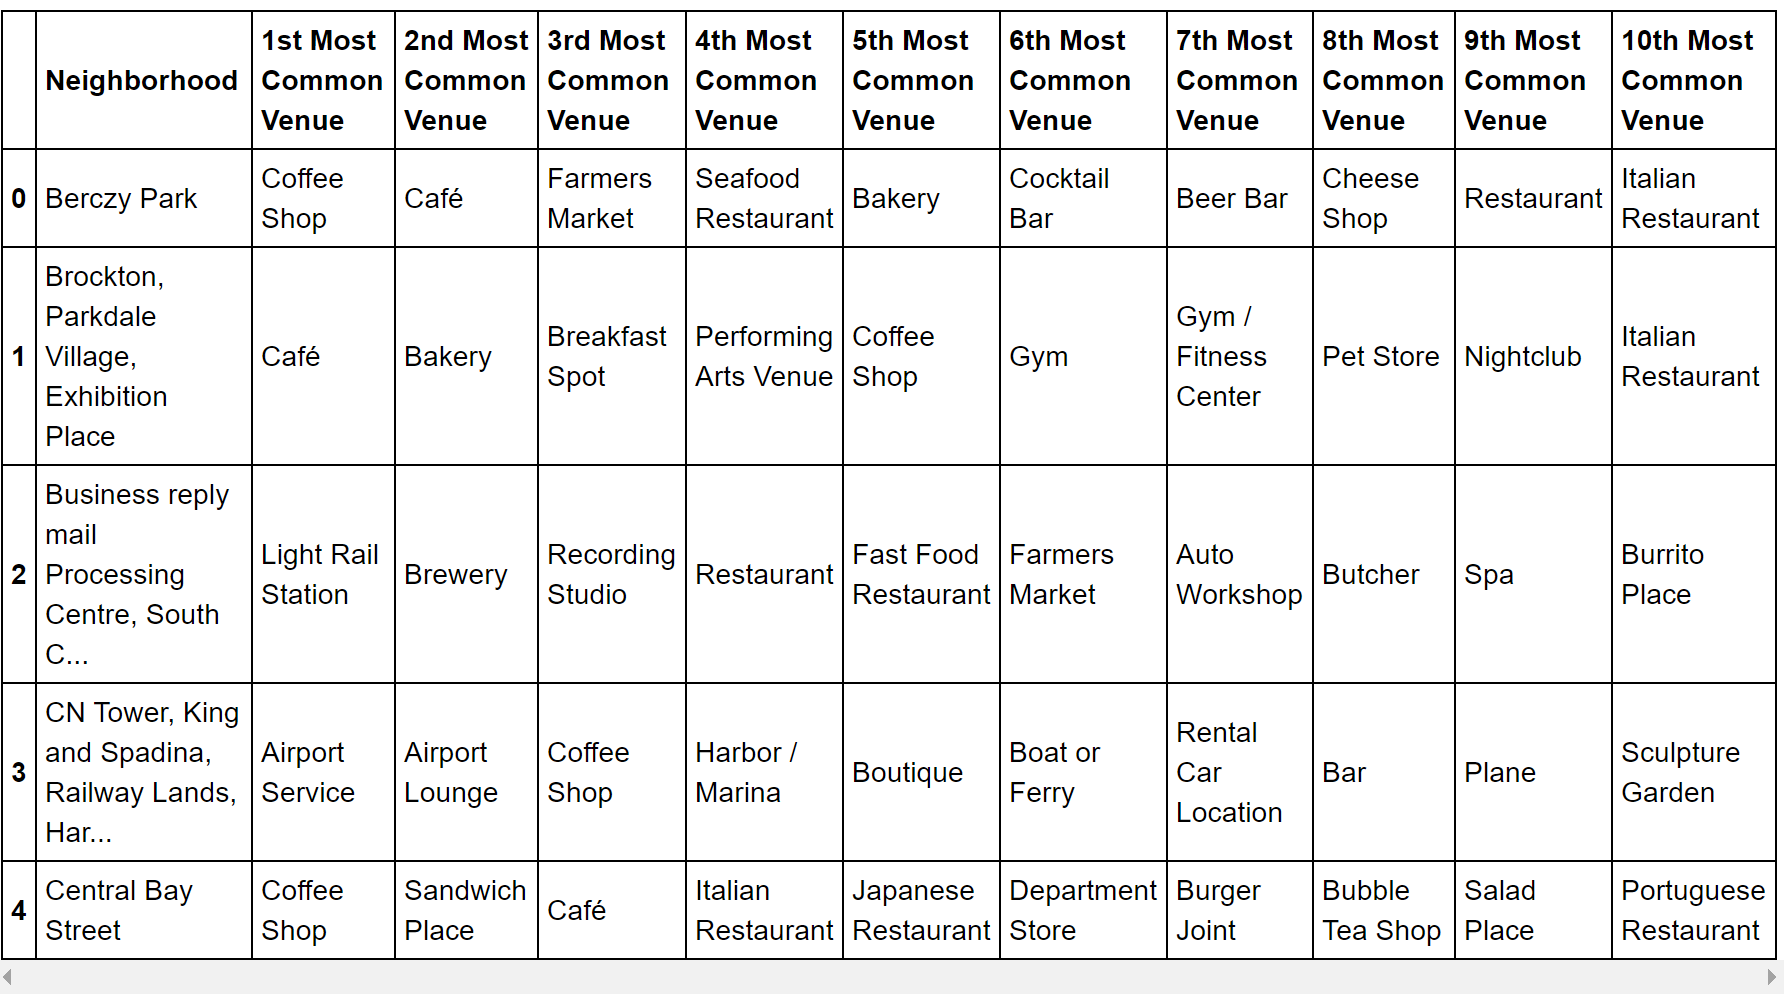

## Cluster Neighborhoods

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

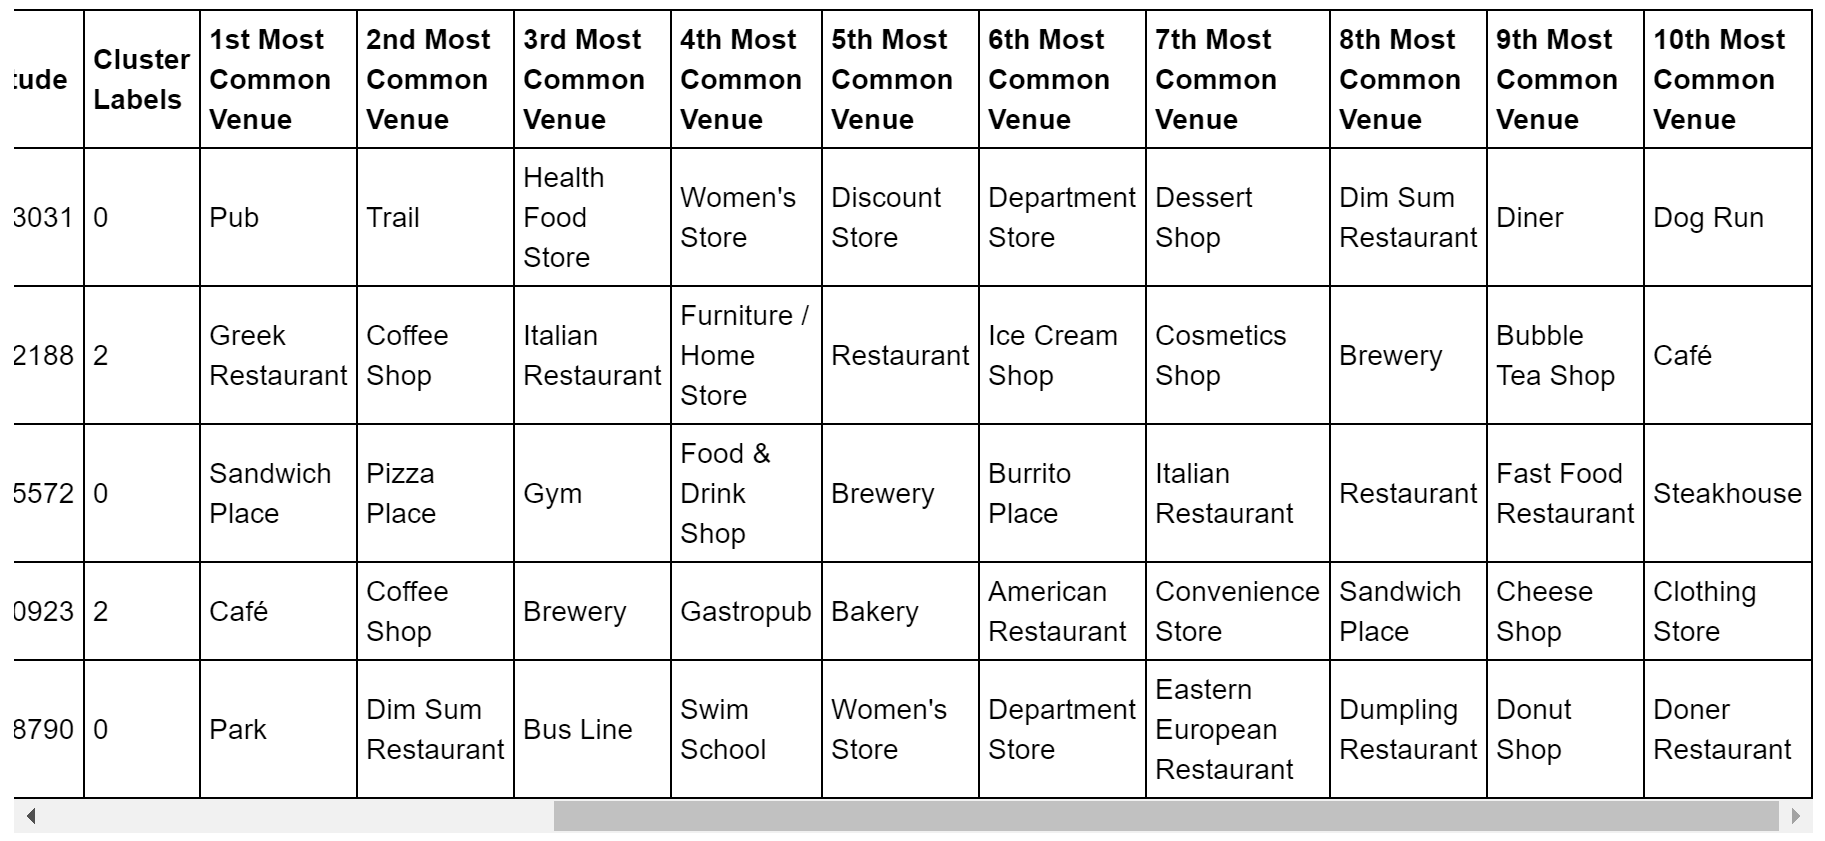

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see that most neighborhoods end up falling in the same cluster. So there is not much difference between the places in Toronto when it comes to what places are popular among the tourists and local people.